# Genome Size Vs Complexity

### Imports

In [7]:
from logic_gates import run_evolution_strong_selection, run_random_walk, Circuit
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
from tqdm.notebook import tqdm

Setting up some utility functions and an object to track isomorphisms

In [8]:
def construct_genome(size: int) -> list:
    genome = []
    for i in range(size):
        genome += [0, 1]
    genome += [2]
    return genome

class IsomorphismCounter:

    def __init__(self):
        self.counter = defaultdict(Counter)

    def add(self, network, size: int):
        for key in self.counter:
            if key.is_isomorphic(network, pruned=True):
                self.counter[key][size] += 1
                self.counter[key]["total"] += 1
                return key
        self.counter[network][size] += 1
        self.counter[network]["total"] += 1
        return network

    def get_networks(self):
        return self.counter.keys()

    def get_number_by_size(self, size: int):
        return {key: value[size] for key, value in self.counter.items()}

    def get_number_networks_total(self):
        return {key: value['total'] for key, value in self.counter.items()}

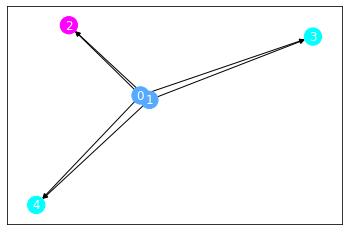

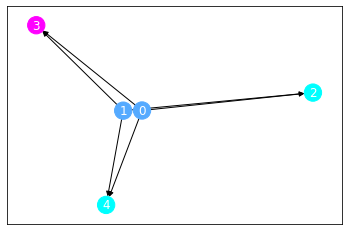

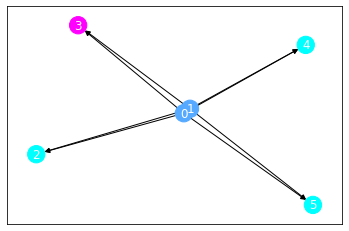

In [9]:
circuit1 = Circuit(2, [0, 1, 0, 1, 0, 1, 2])
circuit1.plot_network()
plt.show()
circuit2 = Circuit(2, [0, 1, 0, 1, 0, 1, 3])
circuit2.plot_network()
plt.show()
circuit3 = Circuit(2, [0, 1, 0, 1, 0, 1, 0, 1, 3])
circuit3.plot_network()
plt.show()

In [10]:
testCounter = IsomorphismCounter()
testCounter.add(circuit1, 3)
testCounter.add(circuit2, 3)
testCounter.add(circuit3, 4)
testCounter.get_number_by_size(3)

{[0, 1, 0, 1, 0, 1, 2]: 2}

Goal Function

In [11]:
def goal_function(x: [bool]) -> bool:
    return x[0] or x[1]

Now the actual simulation

3


  0%|          | 0/100 [00:00<?, ?it/s]

Median:8370.0
Mean:10674.4
STD:8229.764034284337
4


  0%|          | 0/100 [00:00<?, ?it/s]

Median:5835.5
Mean:7029.11
STD:5490.66096184239
5


  0%|          | 0/100 [00:00<?, ?it/s]

Median:5799.0
Mean:6887.04
STD:5179.688291625279
6


  0%|          | 0/100 [00:00<?, ?it/s]

Median:6742.5
Mean:6668.37
STD:4946.041224363178
7


  0%|          | 0/100 [00:00<?, ?it/s]

Median:6359.0
Mean:7229.64
STD:6027.4599086514045
8


  0%|          | 0/100 [00:00<?, ?it/s]

Median:7320.5
Mean:8535.06
STD:5966.051184527334
9


  0%|          | 0/100 [00:00<?, ?it/s]

Median:7137.0
Mean:7994.43
STD:5899.234532132114
10


  0%|          | 0/100 [00:00<?, ?it/s]

Median:8606.0
Mean:8429.36
STD:6498.291567050528
11


  0%|          | 0/100 [00:00<?, ?it/s]

Median:8374.0
Mean:9841.05
STD:6797.207546301642
12


  0%|          | 0/100 [00:00<?, ?it/s]

Median:8069.5
Mean:9013.03
STD:6653.963161086782
13


  0%|          | 0/100 [00:00<?, ?it/s]

Median:10835.0
Mean:10219.19
STD:6304.160065694716


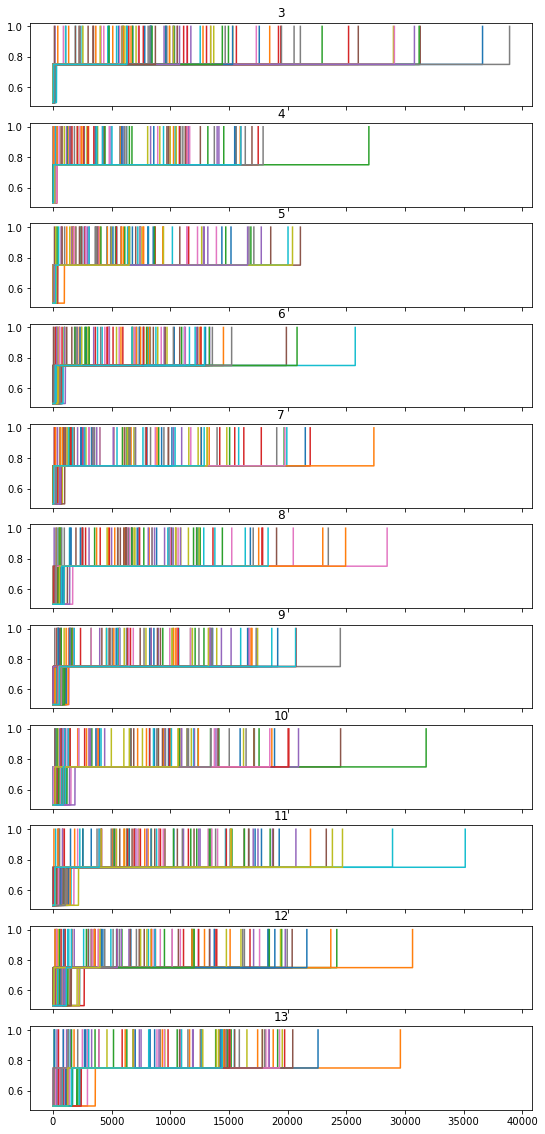

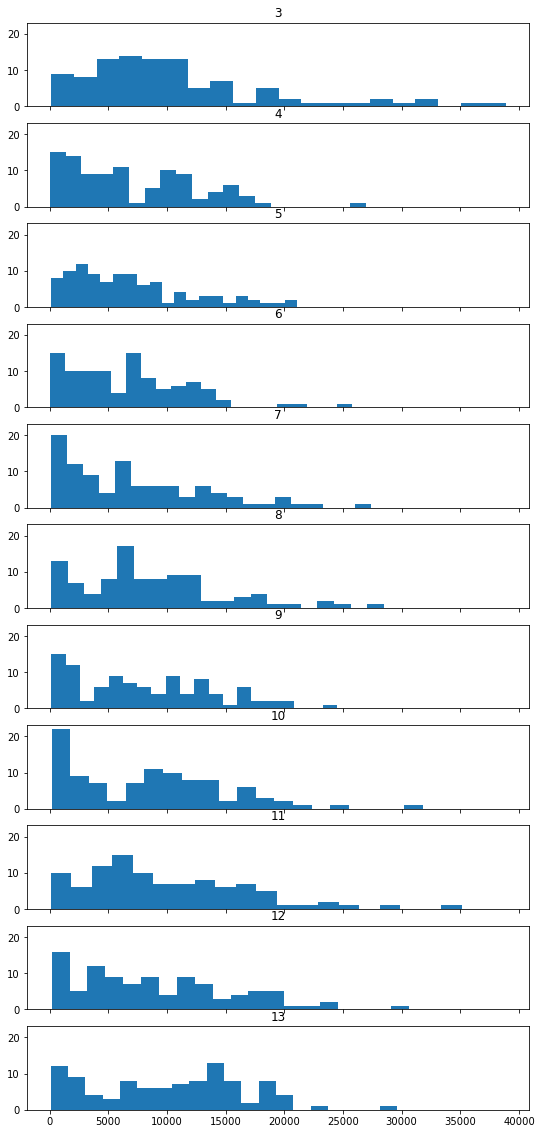

In [12]:
sizes = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
fig_trajectory, ax_trajectories = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
fig_histogram, ax_histograms = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
means = []
medians = []
stds = []
isomorphism_counter = IsomorphismCounter()
num_trials = 100
for size, ax_trajectory, ax_histogram in zip(sizes, ax_trajectories, ax_histograms):
    ax_trajectory.set_title(size)
    ax_histogram.set_title(size)
    initial_circuit = Circuit(2, construct_genome(size))
    total_times = []
    print(size)
    for i in tqdm(range(num_trials)):
        time, circuits, fitness = run_evolution_strong_selection(goal_function, 1000, 0.1, initial_circuit, 1000000)
        total_times.append(len(time))
        ax_trajectory.plot(fitness)
        isomorphism_counter.add(circuits[-1], size)
    total_times_array = np.array(total_times)
    medians.append(np.median(total_times_array))
    print("Median:" + str(medians[-1]))
    means.append(total_times_array.mean())
    print("Mean:" + str(means[-1]))
    stds.append(total_times_array.std())
    print("STD:" + str(stds[-1]))
    ax_histogram.hist(total_times, 20)
fig_trajectory.savefig('trajectories.png', dpi=1200)
fig_histogram.savefig('histogram_fixations100.png')
plt.show()

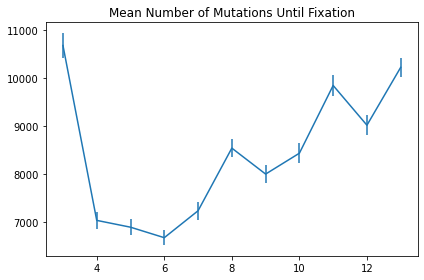

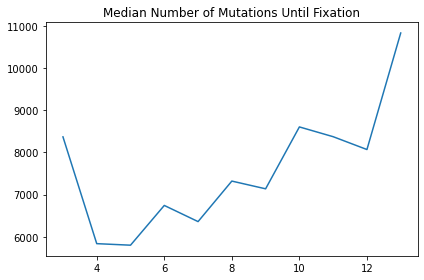

In [13]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=means, yerr=np.array(stds)/np.sqrt(1000))
ax.set_title("Mean Number of Mutations Until Fixation")
plt.show()

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=medians)
ax.set_title("Median Number of Mutations Until Fixation")
plt.show()

Maybe this can in some way be connected to the fact that adding more area for the binding site (more flexibility) leads to a greater chance of evolution. If I understood that correctly the other day.

Counter({'total': 357, 3: 81, 4: 52, 5: 46, 7: 36, 6: 35, 8: 29, 9: 23, 12: 16, 10: 14, 11: 13, 13: 12})


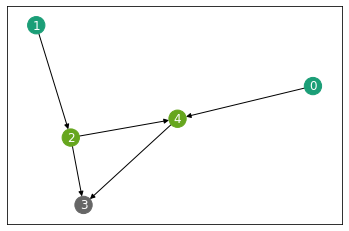

Counter({'total': 87, 3: 19, 4: 17, 5: 13, 6: 9, 10: 6, 11: 6, 7: 5, 12: 4, 9: 3, 13: 3, 8: 2})


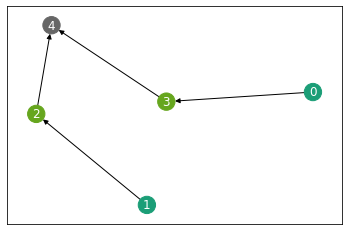

Counter({'total': 97, 6: 15, 4: 13, 7: 12, 8: 9, 13: 9, 5: 8, 9: 8, 10: 8, 11: 8, 12: 7})


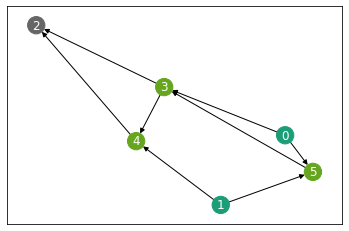

Counter({'total': 76, 10: 12, 6: 10, 13: 9, 4: 7, 5: 7, 7: 7, 11: 7, 9: 6, 12: 6, 8: 5})


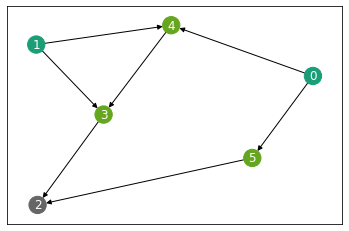

Counter({'total': 53, 10: 11, 6: 7, 7: 6, 4: 5, 8: 5, 13: 5, 5: 4, 9: 4, 11: 3, 12: 3})


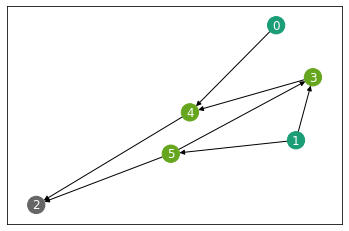

Counter({'total': 44, 4: 6, 8: 6, 5: 5, 6: 5, 7: 5, 9: 5, 13: 5, 11: 3, 10: 2, 12: 2})


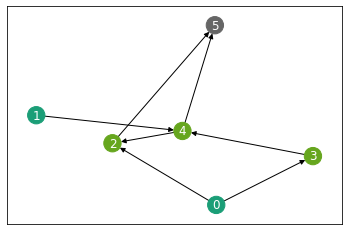

Counter({'total': 5, 5: 1, 8: 1, 10: 1, 11: 1, 13: 1})


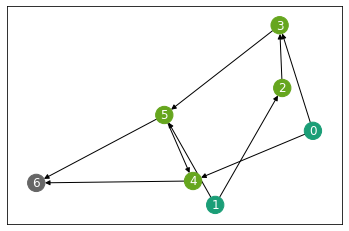

Counter({'total': 9, 6: 2, 10: 2, 5: 1, 8: 1, 9: 1, 11: 1, 13: 1})


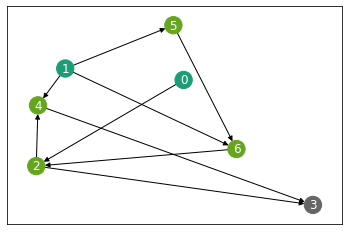

Counter({'total': 5, 5: 2, 6: 1, 10: 1, 13: 1})


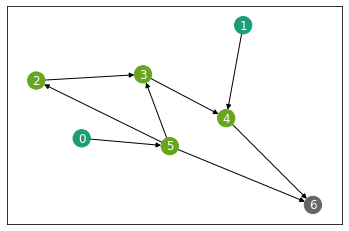

Counter({'total': 19, 9: 4, 5: 3, 7: 3, 8: 3, 10: 3, 11: 2, 6: 1})


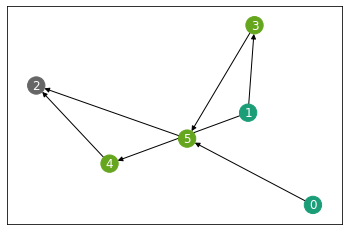

Counter({'total': 6, 9: 2, 5: 1, 8: 1, 12: 1, 13: 1})


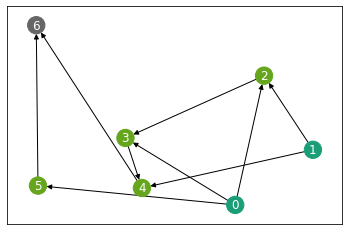

Counter({'total': 6, 12: 2, 5: 1, 6: 1, 8: 1, 11: 1})


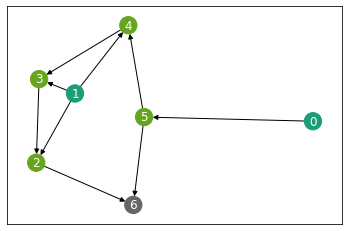

Counter({'total': 13, 7: 3, 13: 3, 6: 2, 9: 2, 8: 1, 10: 1, 11: 1})


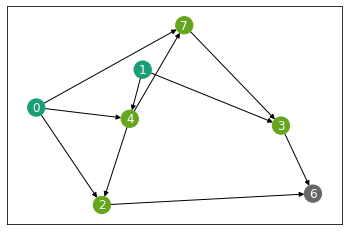

Counter({'total': 5, 12: 2, 7: 1, 10: 1, 11: 1})


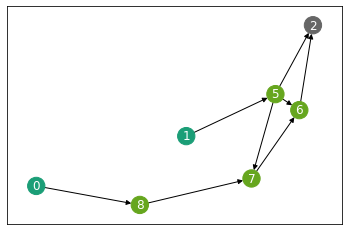

Counter({'total': 6, 8: 5, 13: 1})


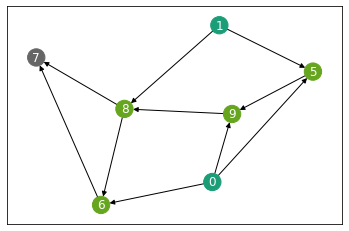

In [14]:
network_counter = isomorphism_counter.counter
for key, value in network_counter.items():
    if value['total'] > 4:
        print(value)
        key.plot_network(prune=True)
        plt.show()

In [15]:
list_unique_networks = list(isomorphism_counter.counter.keys())
list_unique_networks[:5]

[[1, 1, 4, 2, 0, 2, 3],
 [1, 1, 0, 0, 3, 2, 4],
 [3, 4, 0, 5, 3, 1, 0, 1, 2],
 [5, 3, 4, 1, 0, 1, 0, 0, 2],
 [5, 4, 5, 1, 3, 0, 1, 1, 2]]

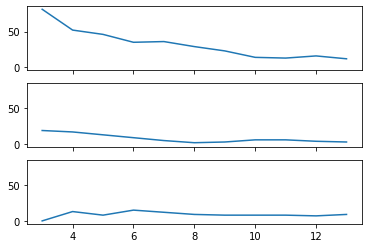

In [16]:
figs, axs = plt.subplots(3, 1, sharex=True, sharey=True)
for ax, network in zip(axs, list_unique_networks[:5]):
    ax.plot(sizes, [isomorphism_counter.get_number_by_size(size)[network] for size in sizes])

In [17]:
len(isomorphism_counter.counter)

271

Now to test how unique this behavior is via a random walk

3


  0%|          | 0/100 [00:00<?, ?it/s]

Median:197.5
Mean:266.14
STD:215.1902888143422
4


  0%|          | 0/100 [00:00<?, ?it/s]

Median:137.5
Mean:171.51
STD:140.77183631678605
5


  0%|          | 0/100 [00:00<?, ?it/s]

Median:94.5
Mean:128.4
STD:125.89972200128163
6


  0%|          | 0/100 [00:00<?, ?it/s]

Median:89.5
Mean:137.04
STD:125.95117466701134
7


  0%|          | 0/100 [00:00<?, ?it/s]

Median:110.0
Mean:125.53
STD:111.9592296329338
8


  0%|          | 0/100 [00:00<?, ?it/s]

Median:95.5
Mean:128.85
STD:112.840806005629
9


  0%|          | 0/100 [00:00<?, ?it/s]

Median:98.0
Mean:135.63
STD:120.4331063287832
10


  0%|          | 0/100 [00:00<?, ?it/s]

Median:94.5
Mean:127.84
STD:104.52403742680437
11


  0%|          | 0/100 [00:00<?, ?it/s]

Median:88.5
Mean:110.08
STD:91.41167102728184
12


  0%|          | 0/100 [00:00<?, ?it/s]

Median:102.5
Mean:131.21
STD:112.66688022662207
13


  0%|          | 0/100 [00:00<?, ?it/s]

Median:95.5
Mean:121.14
STD:95.22720409630853


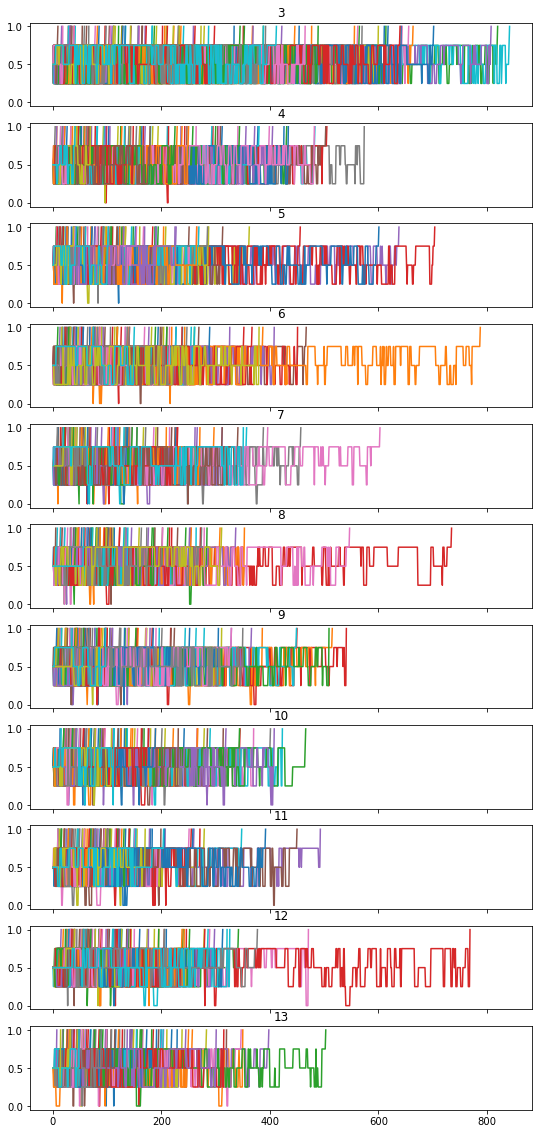

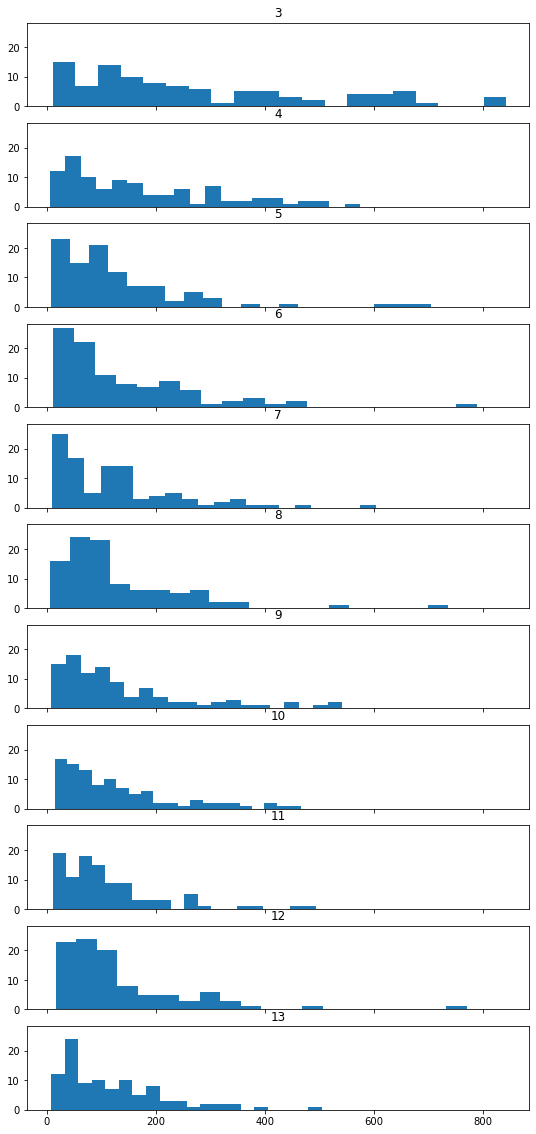

In [18]:
fig_trajectory, ax_trajectories = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
fig_histogram, ax_histograms = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
means = []
medians = []
stds = []
isomorphism_counter_random_walk = IsomorphismCounter()
num_trials = 100
for size, ax_trajectory, ax_histogram in zip(sizes, ax_trajectories, ax_histograms):
    ax_trajectory.set_title(size)
    ax_histogram.set_title(size)
    initial_circuit = Circuit(2, construct_genome(size))
    total_times = []
    print(size)
    for i in tqdm(range(num_trials)):
        time, circuits, fitness = run_random_walk(goal_function, 1000, 0.1, initial_circuit, 1000000)
        total_times.append(len(time))
        ax_trajectory.plot(fitness)
        isomorphism_counter_random_walk.add(circuits[-1], str(size) + " Random Walk")
    total_times_array = np.array(total_times)
    medians.append(np.median(total_times_array))
    print("Median:" + str(medians[-1]))
    means.append(total_times_array.mean())
    print("Mean:" + str(means[-1]))
    stds.append(total_times_array.std())
    print("STD:" + str(stds[-1]))
    ax_histogram.hist(total_times, 20)
fig_trajectory.savefig('trajectories.png', dpi=1200)
fig_histogram.savefig('histogram_fixations100.png')
plt.show()

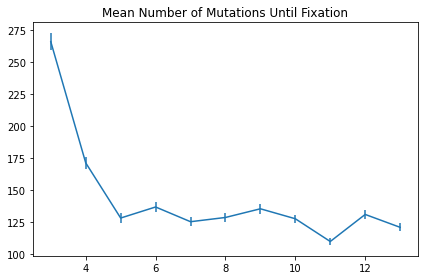

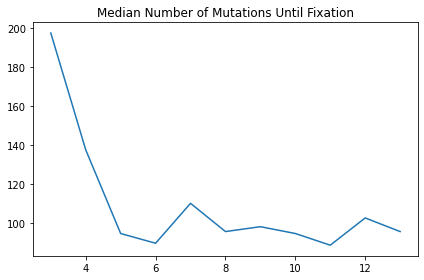

In [19]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=means, yerr=np.array(stds)/np.sqrt(1000))
ax.set_title("Mean Number of Mutations Until Fixation")
plt.show()

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=medians)
ax.set_title("Median Number of Mutations Until Fixation")
plt.show()

Counter({'total': 345, '3 Random Walk': 81, '4 Random Walk': 61, '5 Random Walk': 48, '6 Random Walk': 37, '7 Random Walk': 26, '8 Random Walk': 23, '9 Random Walk': 17, '12 Random Walk': 17, '10 Random Walk': 14, '11 Random Walk': 11, '13 Random Walk': 10})


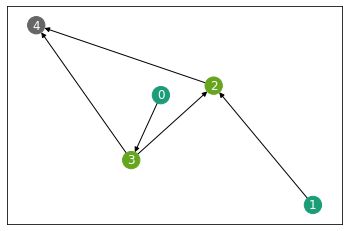

Counter({'total': 77, '3 Random Walk': 19, '10 Random Walk': 9, '6 Random Walk': 8, '4 Random Walk': 7, '5 Random Walk': 6, '7 Random Walk': 6, '8 Random Walk': 6, '9 Random Walk': 5, '11 Random Walk': 5, '12 Random Walk': 5, '13 Random Walk': 1})


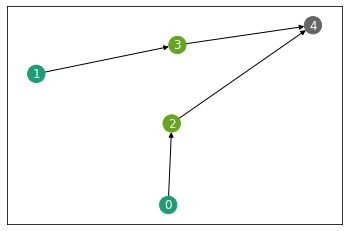

Counter({'total': 39, '4 Random Walk': 5, '7 Random Walk': 5, '12 Random Walk': 5, '13 Random Walk': 5, '9 Random Walk': 4, '10 Random Walk': 4, '11 Random Walk': 4, '6 Random Walk': 3, '8 Random Walk': 3, '5 Random Walk': 1})


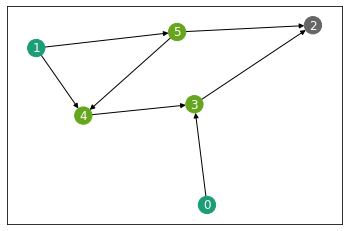

Counter({'total': 60, '5 Random Walk': 13, '7 Random Walk': 9, '6 Random Walk': 8, '11 Random Walk': 7, '9 Random Walk': 6, '4 Random Walk': 5, '8 Random Walk': 5, '10 Random Walk': 4, '13 Random Walk': 3})


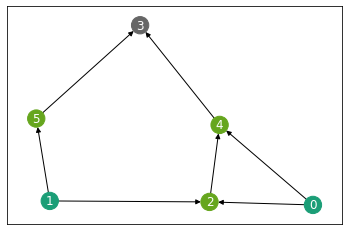

Counter({'total': 17, '4 Random Walk': 4, '5 Random Walk': 4, '6 Random Walk': 3, '12 Random Walk': 2, '7 Random Walk': 1, '9 Random Walk': 1, '10 Random Walk': 1, '13 Random Walk': 1})


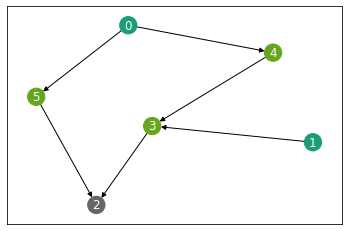

Counter({'total': 41, '6 Random Walk': 6, '8 Random Walk': 6, '4 Random Walk': 5, '5 Random Walk': 5, '7 Random Walk': 5, '9 Random Walk': 5, '12 Random Walk': 4, '10 Random Walk': 3, '13 Random Walk': 2})


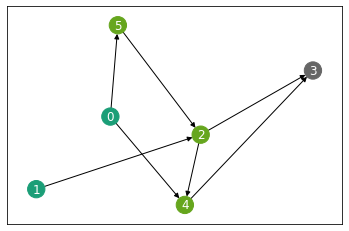

Counter({'total': 94, '5 Random Walk': 15, '9 Random Walk': 14, '4 Random Walk': 13, '6 Random Walk': 12, '8 Random Walk': 10, '7 Random Walk': 7, '11 Random Walk': 7, '10 Random Walk': 6, '12 Random Walk': 5, '13 Random Walk': 5})


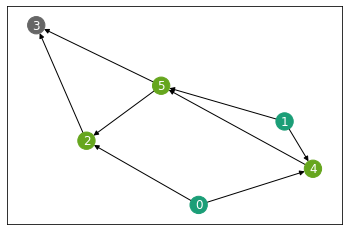

Counter({'total': 7, '11 Random Walk': 2, '13 Random Walk': 2, '5 Random Walk': 1, '7 Random Walk': 1, '9 Random Walk': 1})


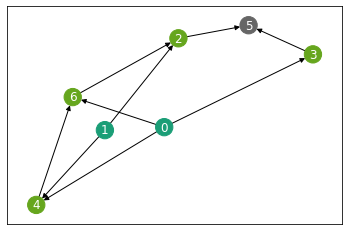

Counter({'total': 8, '7 Random Walk': 3, '5 Random Walk': 1, '8 Random Walk': 1, '11 Random Walk': 1, '12 Random Walk': 1, '13 Random Walk': 1})


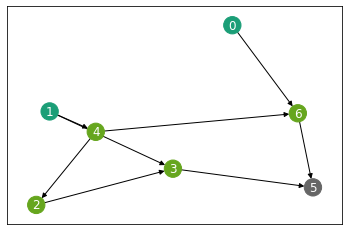

Counter({'total': 5, '13 Random Walk': 2, '5 Random Walk': 1, '6 Random Walk': 1, '7 Random Walk': 1})


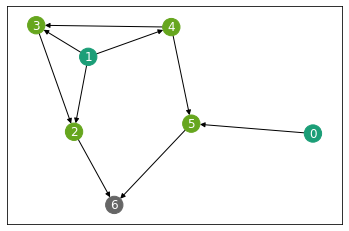

Counter({'total': 9, '5 Random Walk': 2, '10 Random Walk': 2, '11 Random Walk': 2, '6 Random Walk': 1, '8 Random Walk': 1, '12 Random Walk': 1})


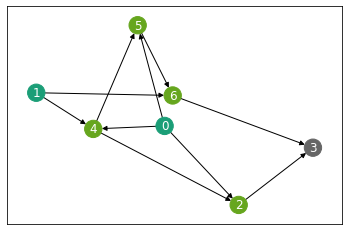

Counter({'total': 6, '9 Random Walk': 2, '6 Random Walk': 1, '11 Random Walk': 1, '12 Random Walk': 1, '13 Random Walk': 1})


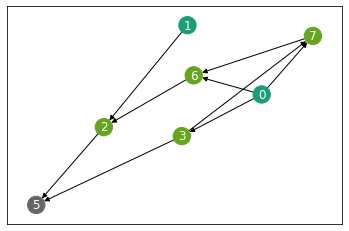

Counter({'total': 8, '9 Random Walk': 3, '6 Random Walk': 1, '7 Random Walk': 1, '10 Random Walk': 1, '12 Random Walk': 1, '13 Random Walk': 1})


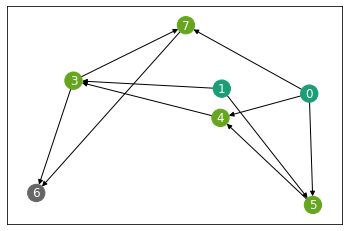

Counter({'total': 5, '7 Random Walk': 2, '8 Random Walk': 1, '9 Random Walk': 1, '12 Random Walk': 1})


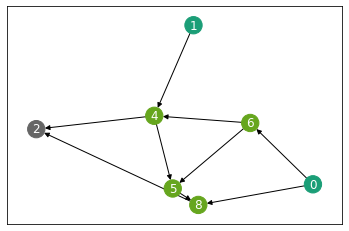

Counter({'total': 6, '7 Random Walk': 2, '10 Random Walk': 2, '12 Random Walk': 2})


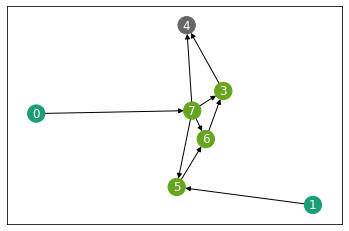

Counter({'total': 5, '12 Random Walk': 2, '7 Random Walk': 1, '8 Random Walk': 1, '10 Random Walk': 1})


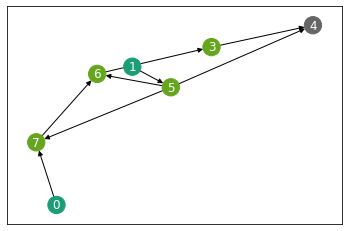

In [20]:
network_counter_random_walk = isomorphism_counter_random_walk.counter
for key, value in network_counter_random_walk.items():
    if value['total'] > 4:
        print(value)
        key.plot_network(prune=True)
        plt.show()

In [21]:
list_unique_networks_random_walk = list(isomorphism_counter_random_walk.counter.keys())
list_unique_networks_random_walk[:5]

[[1, 3, 0, 0, 3, 2, 4],
 [0, 0, 1, 1, 2, 3, 4],
 [5, 3, 4, 0, 5, 1, 1, 1, 2],
 [0, 1, 4, 5, 2, 0, 1, 1, 3],
 [3, 5, 1, 4, 0, 0, 0, 0, 2]]

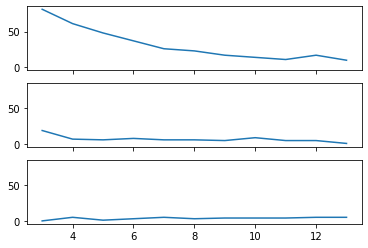

In [22]:
figs, axs = plt.subplots(3, 1, sharex=True, sharey=True)
for ax, network in zip(axs, list_unique_networks_random_walk):
    ax.plot(sizes, [isomorphism_counter_random_walk.get_number_by_size(str(size) + " Random Walk")[network] for size in sizes])